# Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

# Importação da base de dados

In [46]:
good_reads = pd.read_csv("goodreads_cleaned.csv")

# Análises iniciais

## Top 5 linhas da base

In [47]:
good_reads.head()

,bookTitle,authorName,average_rating,num_ratings
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,"8,693,386"
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,"3,393,240"
2,Pride and Prejudice,Jane Austen,4.29,"4,280,986"
3,To Kill a Mockingbird,Harper Lee,4.26,"6,141,418"
4,The Book Thief,Markus Zusak,4.39,"2,565,715"


## Formato da base

In [48]:
# A base possui 10 mil linhas e 4 colunas
good_reads.shape

(10000, 4)

## Identificação e tratamento de valores nulos

In [49]:
#A base possui valores nulos?
good_reads.isnull().sum()

bookTitle         0
authorName        0
average_rating    4
num_ratings       4
dtype: int64

In [50]:
#Preenchimento dos valores nulos com a média

good_reads["average_rating"].mean() #4.05

good_reads["average_rating"].fillna(4.05, inplace = True)

In [63]:
#Remoção dos valores nulos da coluna de número de avaliações
good_reads.dropna(inplace = True)

In [64]:
#Estatísticas
good_reads.describe()

,average_rating
count,9996.000000
mean,4.052615
std,0.314170
min,0.000000
25%,3.890000
50%,4.070000
75%,4.240000
max,5.000000


## Conversão da coluna com o número de avaliações de str para int

In [65]:
#Informações
good_reads.info()

#nota-se que a coluna com os números de avaliações está classificada como string. Será necessário realizar a conversão para int.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bookTitle       9996 non-null   object 
 1   authorName      9996 non-null   object 
 2   average_rating  9996 non-null   float64
 3   num_ratings     9996 non-null   object 
dtypes: float64(1), object(3)
memory usage: 390.5+ KB


In [66]:
#Remoção da vírgula nos valores da coluna do número de avaliações

good_reads["num_ratings"] = good_reads["num_ratings"].apply(lambda x: str(x).replace(",", ""))

In [77]:
good_reads["num_ratings"] = good_reads["num_ratings"].apply(lambda i: int(i))

In [78]:
good_reads.info() #Conversão realizada

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bookTitle       9996 non-null   object 
 1   authorName      9996 non-null   object 
 2   average_rating  9996 non-null   float64
 3   num_ratings     9996 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 390.5+ KB


In [79]:
#Estatísticas
good_reads.describe()

,average_rating,num_ratings
count,9996.000000,9.996000e+03
mean,4.052615,1.273443e+05
std,0.314170,3.791393e+05
min,0.000000,0.000000e+00
25%,3.890000,1.248775e+04
50%,4.070000,3.642100e+04
75%,4.240000,9.352175e+04
max,5.000000,1.008507e+07


## Identificação e tratamento de valores duplicados

In [103]:
#A base possui valores duplicados?

#Lista com todos os valores duplicados
good_reads[good_reads.duplicated(keep =  False)].sort_values("bookTitle")

,bookTitle,authorName,average_rating,num_ratings
47,1984,George Orwell,4.19,4617941
2745,1984,George Orwell,4.19,4617961
7655,1984,George Orwell,4.19,4617961
1292,1984,George Orwell,4.19,4617941
2456,A Castle of Doomsday,Michael G. Kramer,4.27,3082
...,...,...,...,...
3,To Kill a Mockingbird,Harper Lee,4.26,6141418
2535,"Triumph: Life on the Other Side of Trials, Tra...",Gregory S. Works,4.26,7208
2644,"Triumph: Life on the Other Side of Trials, Tra...",Gregory S. Works,4.26,7208
6548,Verity,Colleen Hoover,4.32,2702625


In [116]:
#Remoção dos valores duplicados
good_reads.drop_duplicates(subset = "bookTitle", keep = "first", inplace = True)

# Quais são os 10 livros mais bem avaliados?

In [118]:
good_reads.sort_values("average_rating", ascending = False).head(10)

,bookTitle,authorName,average_rating,num_ratings
6280,Obscured Darkness (Family Secrets #2),Rebekah McClew,5.00,9
5605,Gris Ange 2014,Lucio Agustine Rosenkreutz Crăciunescu,5.00,9
9761,Anshuman krit Saral Vastu Gyan,Anshuman Srivastav,5.00,9
5640,Das geheimnis der blumen,Mykhaella Caponi,5.00,8
7446,Elliptical door (A multifaceted overview) (US)...,Lucio Agustine Rosenkreutz Crăciunescu,5.00,12
7395,Rosto Inacabado (Pequenos segredos alquímicos)...,Lucio Agustine Rosenkreutz Crăciunescu,5.00,8
9919,Patience's Love,Ronda Paige,5.00,10
6435,Armée des ombres,Lucio Agustine Rosenkreutz Crăciunescu,5.00,12
5624,Coeur pourri de laine,Lucio Agustine Rosenkreutz Crăciunescu,5.00,9
4247,A Day in the Life of Cowboy Mike and Winston,Michael Eastwood,4.94,111


In [119]:
len(good_reads[good_reads["average_rating"] == 5])

9

É interessante notar que apenas 9 livros receberam a nota máxima. No entanto, o número de avaliações que esses mesmos livros receberam foi muito baixo, o que inviabiliza a confiabilidade nesses resultados.

---
5 dos 9 livros que receberam a nota máxima pertencem ao autor Lucio Agustine Rosenkreutz Crăciunescu.

In [146]:
good_reads[good_reads["authorName"] == "Lucio Agustine Rosenkreutz Crăciunescu"]

,bookTitle,authorName,average_rating,num_ratings
5605,Gris Ange 2014,Lucio Agustine Rosenkreutz Crăciunescu,5.0,9
5624,Coeur pourri de laine,Lucio Agustine Rosenkreutz Crăciunescu,5.0,9
6435,Armée des ombres,Lucio Agustine Rosenkreutz Crăciunescu,5.0,12
7395,Rosto Inacabado (Pequenos segredos alquímicos)...,Lucio Agustine Rosenkreutz Crăciunescu,5.0,8
7446,Elliptical door (A multifaceted overview) (US)...,Lucio Agustine Rosenkreutz Crăciunescu,5.0,12


# Quais são os 10 livros com as maiores quantidades de avaliações?

In [120]:
good_reads.sort_values("num_ratings", ascending = False).head(10)

,bookTitle,authorName,average_rating,num_ratings
53,Harry Potter and the Sorcerer’s Stone (Harry P...,J.K. Rowling,4.47,10085072
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,8693386
5,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,3.65,6594950
3,To Kill a Mockingbird,Harper Lee,4.26,6141418
17,The Great Gatsby,F. Scott Fitzgerald,3.93,5255511
9,The Fault in Our Stars,John Green,4.14,5152789
47,1984,George Orwell,4.19,4617941
2,Pride and Prejudice,Jane Austen,4.29,4280986
65,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.58,4201102
116,"The Hobbit (The Lord of the Rings, #0)",J.R.R. Tolkien,4.29,3987562


Dos 10 livros com as maiores quantidades de avaliações, dois ficaram com uma média abaixo de 4: O Grande Gatsby e o primeiro volume da saga Crepúsculo.

---
J.K. Rowling foi a única autora que apareceu mais de uma vez nesta lista.

# Top 10 autores com as maiores quantidades de avaliações

In [133]:
good_reads[["authorName", "num_ratings"]].groupby("authorName").sum().sort_values("num_ratings", ascending = False).head(10)

,num_ratings
authorName,
J.K. Rowling,36218552
Sarah J. Maas,18218823
Stephen King,17330255
Colleen Hoover,17320798
Suzanne Collins,16892622
Stephenie Meyer,14050669
Rick Riordan,12635950
J.R.R. Tolkien,10287899
John Green,9887287


Os 10 autores com as maiores quantidades de avaliações são todos de língua inglesa.

# Livros da autora mais avaliada

In [145]:
good_reads[good_reads["authorName"] == "J.K. Rowling"].groupby("bookTitle").mean()[["average_rating"]].sort_values("average_rating", ascending = False)

,average_rating
bookTitle,
"Harry Potter Series Box Set (Harry Potter, #1-7)",4.74
"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)",4.72
"Harry Potter Collection (Harry Potter, #1-6)",4.72
"The Harry Potter Collection 1-4 (Harry Potter, #1-4)",4.69
"Harry Potter and the Deathly Hallows (Harry Potter, #7)",4.62
"Harry Potter and the Order of the Phoenix (Harry Potter, #5, Part 1)",4.61
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",4.58
"Harry Potter and the Half-Blood Prince (Harry Potter, #6)",4.58
"Harry Potter and the Goblet of Fire (Harry Potter, #4)",4.57


Nota-se que as coleções costumam receber avaliações melhores do que os livros individualmente.

# Distribuição da quantidade de avaliações

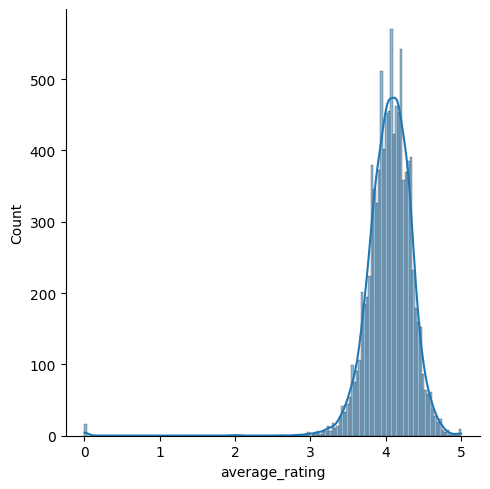

In [149]:
sns.displot(good_reads, 
            x = "average_rating", 
            kde = True)

In [165]:
good_reads.describe()

,average_rating,num_ratings
count,9838.000000,9.838000e+03
mean,4.050213,1.149165e+05
std,0.314225,3.346912e+05
min,0.000000,0.000000e+00
25%,3.890000,1.241875e+04
50%,4.070000,3.593950e+04
75%,4.240000,9.072300e+04
max,5.000000,1.008507e+07


É possível perceber que 50 % da base está concentrada no intervalo de avaliações entre 3.89 e 4.24, com uma mediana de 4.07.

--- 
O baixo desvio padrão nos mostra que os dados não estão muito dispersos em relação à média.